In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
accre = pd.read_csv('accre-gpu-jobs-2022-v2.csv', on_bad_lines='skip')


In [3]:
accre = pd.DataFrame(accre)
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66M,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32M,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62M,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09M,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24M,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [4]:
#deleting the value M from USEDMEM column
accre['USEDMEM'] = accre['USEDMEM'].str.replace(r'[a-zA-Z]','', regex=True)
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,2-00:00:00,00:13:13,1,2,1,pascal,0:0,COMPLETED
1,32880701,glasshouse,brady,0,05:00:00,00:00:22,1,3,1,maxwell,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,05:00:00,00:08:57,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,20:00:00,05:09:46,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,15:00:00,04:11:10,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336945,46754520_26,harovin,porsha,0,5-00:00:00,00:07:07,1,6,1,turing,0:0,RUNNING
336946,46754542,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336947,46754560,malanga,arline,0,2-00:00:00,00:00:00,0,2,1,pascal,0:0,PENDING
336948,46754598,glasshouse,treva,145.24,1-00:00:00,00:01:26,1,5,1,turing,0:0,COMPLETED


In [5]:
accre['REQTIME'] = accre['REQTIME'].astype(str)
accre['USEDTIME'] = accre['USEDTIME'].astype(str)
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME'].str.replace('-',' days '))
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME'].str.replace('-',' days '))
accre['REQTIME'] = pd.to_timedelta(accre['REQTIME']).dt.total_seconds()
accre['USEDTIME'] = pd.to_timedelta(accre['USEDTIME']).dt.total_seconds()
accre = accre[accre['USEDMEM'].map(len) > 1]
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,172800.0,793.0,1,2,1,pascal,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,18000.0,537.0,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,72000.0,18586.0,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,54000.0,15070.0,1,1,1,pascal,0:0,COMPLETED
5,32880721,glasshouse,brady,403.40,302400.0,67776.0,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,432000.0,52.0,1,1,1,turing,0:0,COMPLETED
336934,46753820_26,harovin,porsha,5093.70,432000.0,2091.0,1,6,1,turing,0:0,COMPLETED
336936,46753823,harovin,shannon,156.21,432000.0,243.0,1,1,1,turing,0:0,COMPLETED
336942,46754095,harovin,shannon,2820.52,432000.0,673.0,1,1,1,turing,0:0,COMPLETED


***What is the distribution of per-GPU main memory usage over all runtime-weighed jobs in each partition? Knowing this will help ACCRE to understand our users memory needs for future hardware purchases.***

In [6]:
#Creating a dataframe with the Maxwell information. 
maxwell = accre[accre['PARTITION'] == 'maxwell']
maxwell_df = pd.DataFrame(maxwell)
maxwell_df

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
2,32880718,glasshouse,brady,402.32,18000.0,537.0,1,3,1,maxwell,0:0,COMPLETED
244,32883667,glasshouse,miya,374.38,14400.0,966.0,1,1,1,maxwell,127:0,FAILED
462,32885245,glasshouse,brady,404.90,18000.0,537.0,1,3,1,maxwell,0:0,COMPLETED
467,32885270,glasshouse,brady,403.18,18000.0,528.0,1,3,1,maxwell,0:0,COMPLETED
508,32885377,glasshouse,brodie,188.82,43200.0,165.0,1,1,1,maxwell,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
335127,46542252,glasshouse,miya,6.57,172800.0,34.0,1,6,4,maxwell,0:0,COMPLETED
335856,46577601,glasshouse,tamara,1.98,288000.0,8.0,2,12,6,maxwell,0:0,COMPLETED
335916,46582283,glasshouse,jonnie,2068.21,172800.0,172838.0,1,6,4,maxwell,0:9,CANCELLED
335984,46586533,glasshouse,tamara,1.79,288000.0,5.0,2,12,6,maxwell,0:0,COMPLETED


In [7]:
#converting the data into a diferent dtype. 
maxwell_regex = maxwell_df['USEDMEM'].str.replace(r'[a-zA-Z]','', regex=True)
maxwell_regex = pd.DataFrame(maxwell_regex)
maxwell_regex['USEDMEM'] = maxwell_regex['USEDMEM'].astype(float)
maxwell_regex

,USEDMEM
2,402.32
244,374.38
462,404.90
467,403.18
508,188.82
...,...
335127,6.57
335856,1.98
335916,2068.21
335984,1.79


In [8]:
maxwell_df['USEDMEM'].describe()

count     125501
unique     36985
top         5.53
freq       24156
Name: USEDMEM, dtype: object

In [9]:
#repeating the code for pascal. 
pascal = accre[accre['PARTITION'] == 'pascal']
pascal_df = pd.DataFrame(pascal)
pascal_df

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,172800.0,793.0,1,2,1,pascal,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,72000.0,18586.0,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,54000.0,15070.0,1,1,1,pascal,0:0,COMPLETED
5,32880721,glasshouse,brady,403.40,302400.0,67776.0,1,1,1,pascal,0:0,COMPLETED
7,32880741,malanga,arline,1119.66,172800.0,29358.0,1,2,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336914,46753151,malanga,arline,29.85,172800.0,868.0,1,2,1,pascal,0:0,COMPLETED
336915,46753169,malanga,arline,28.11,172800.0,856.0,1,2,1,pascal,0:0,COMPLETED
336916,46753170,glasshouse,tamara,10007.76,72000.0,1756.0,1,5,4,pascal,0:0,COMPLETED
336917,46753171,malanga,arline,28.21,172800.0,869.0,1,2,1,pascal,0:0,COMPLETED


In [10]:
pascal_regex = pascal_df['USEDMEM'].str.replace(r'[a-zA-Z]','', regex=True)
pascal_regex = pd.DataFrame(pascal_regex)
pascal_regex['USEDMEM'] = pascal_regex['USEDMEM'].astype(float)
pascal_regex

,USEDMEM
0,18.66
3,417.62
4,450.09
5,403.40
7,1119.66
...,...
336914,29.85
336915,28.11
336916,10007.76
336917,28.21


In [11]:
pascal_df['USEDMEM'].describe()

count     78046
unique    49225
top        5.53
freq       2363
Name: USEDMEM, dtype: object

In [12]:
#repeating the code for turing. 
turing = accre[accre['PARTITION'] == 'turing']
turing_df = pd.DataFrame(turing)
turing_df

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
80,32881540,virginia,garrett,4039.36,7200.0,7205.0,1,6,1,turing,0:0,COMPLETED
91,32882556,virginia,garrett,55.39,21600.0,21605.0,1,6,1,turing,0:0,COMPLETED
92,32882567,virginia,garrett,281.12,21600.0,21605.0,1,6,1,turing,0:0,COMPLETED
93,32882568,virginia,garrett,57.32,21600.0,21617.0,1,6,1,turing,0:0,COMPLETED
172,32883336,virginia,erla,129.24,3600.0,3292.0,1,6,1,turing,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,432000.0,52.0,1,1,1,turing,0:0,COMPLETED
336934,46753820_26,harovin,porsha,5093.70,432000.0,2091.0,1,6,1,turing,0:0,COMPLETED
336936,46753823,harovin,shannon,156.21,432000.0,243.0,1,1,1,turing,0:0,COMPLETED
336942,46754095,harovin,shannon,2820.52,432000.0,673.0,1,1,1,turing,0:0,COMPLETED


In [13]:
turing_regex = turing_df['USEDMEM'].str.replace(r'[a-zA-Z]','', regex=True)
turing_regex = pd.DataFrame(turing_regex)
turing_regex['USEDMEM'] = turing_regex['USEDMEM'].astype(float)
turing_regex

,USEDMEM
80,4039.36
91,55.39
92,281.12
93,57.32
172,129.24
...,...
336933,137.96
336934,5093.70
336936,156.21
336942,2820.52


In [14]:
turing_df['USEDMEM'].describe()

count     74653
unique    42116
top        7.41
freq      15491
Name: USEDMEM, dtype: object

In [15]:
turing_df.mean(numeric_only=True)

REQTIME     48937.233869
USEDTIME     7973.331427
NODES           1.003684
CPUS            2.934899
GPUS            1.076313
dtype: float64

In [16]:
turing_regex.describe()

,USEDMEM
count,74653.000000
mean,3879.825237
std,10278.254973
min,0.000000
25%,7.410000
50%,1277.840000
75%,2423.260000
max,371247.350000


In [17]:
accre = accre[accre['USEDMEM'].notnull()].copy()
accre['USEDMEM'] = accre['USEDMEM'].astype(float).astype(str)
accre

,JOBID,ACCOUNT,USER,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,GPUS,PARTITION,EXITCODE,STATE
0,32880657,malanga,arline,18.66,172800.0,793.0,1,2,1,pascal,0:0,COMPLETED
2,32880718,glasshouse,brady,402.32,18000.0,537.0,1,3,1,maxwell,0:0,COMPLETED
3,32880719,glasshouse,brady,417.62,72000.0,18586.0,1,1,1,pascal,0:0,COMPLETED
4,32880720,glasshouse,brady,450.09,54000.0,15070.0,1,1,1,pascal,0:0,COMPLETED
5,32880721,glasshouse,brady,403.4,302400.0,67776.0,1,1,1,pascal,0:0,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
336933,46753813,harovin,shannon,137.96,432000.0,52.0,1,1,1,turing,0:0,COMPLETED
336934,46753820_26,harovin,porsha,5093.7,432000.0,2091.0,1,6,1,turing,0:0,COMPLETED
336936,46753823,harovin,shannon,156.21,432000.0,243.0,1,1,1,turing,0:0,COMPLETED
336942,46754095,harovin,shannon,2820.52,432000.0,673.0,1,1,1,turing,0:0,COMPLETED


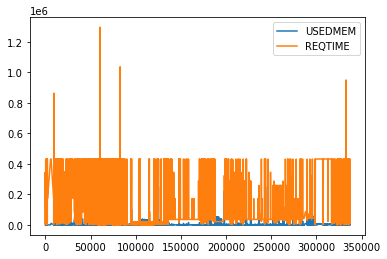

In [18]:
accre['USEDMEM']=pd.to_numeric(accre['USEDMEM'])
accre['REQTIME']=pd.to_numeric(accre['REQTIME'])
accre[['USEDMEM','REQTIME']].plot()
plt.show()

/var/folders/bk/4_dns4_x6z3_rrb8824x_td40000gn/T/ipykernel_10014/355637234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maxwell['USEDMEM']=pd.to_numeric(accre['USEDMEM'])
/var/folders/bk/4_dns4_x6z3_rrb8824x_td40000gn/T/ipykernel_10014/355637234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pascal['USEDMEM']=pd.to_numeric(accre['USEDMEM'])
/var/folders/bk/4_dns4_x6z3_rrb8824x_td40000gn/T/ipykernel_10014/355637234.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

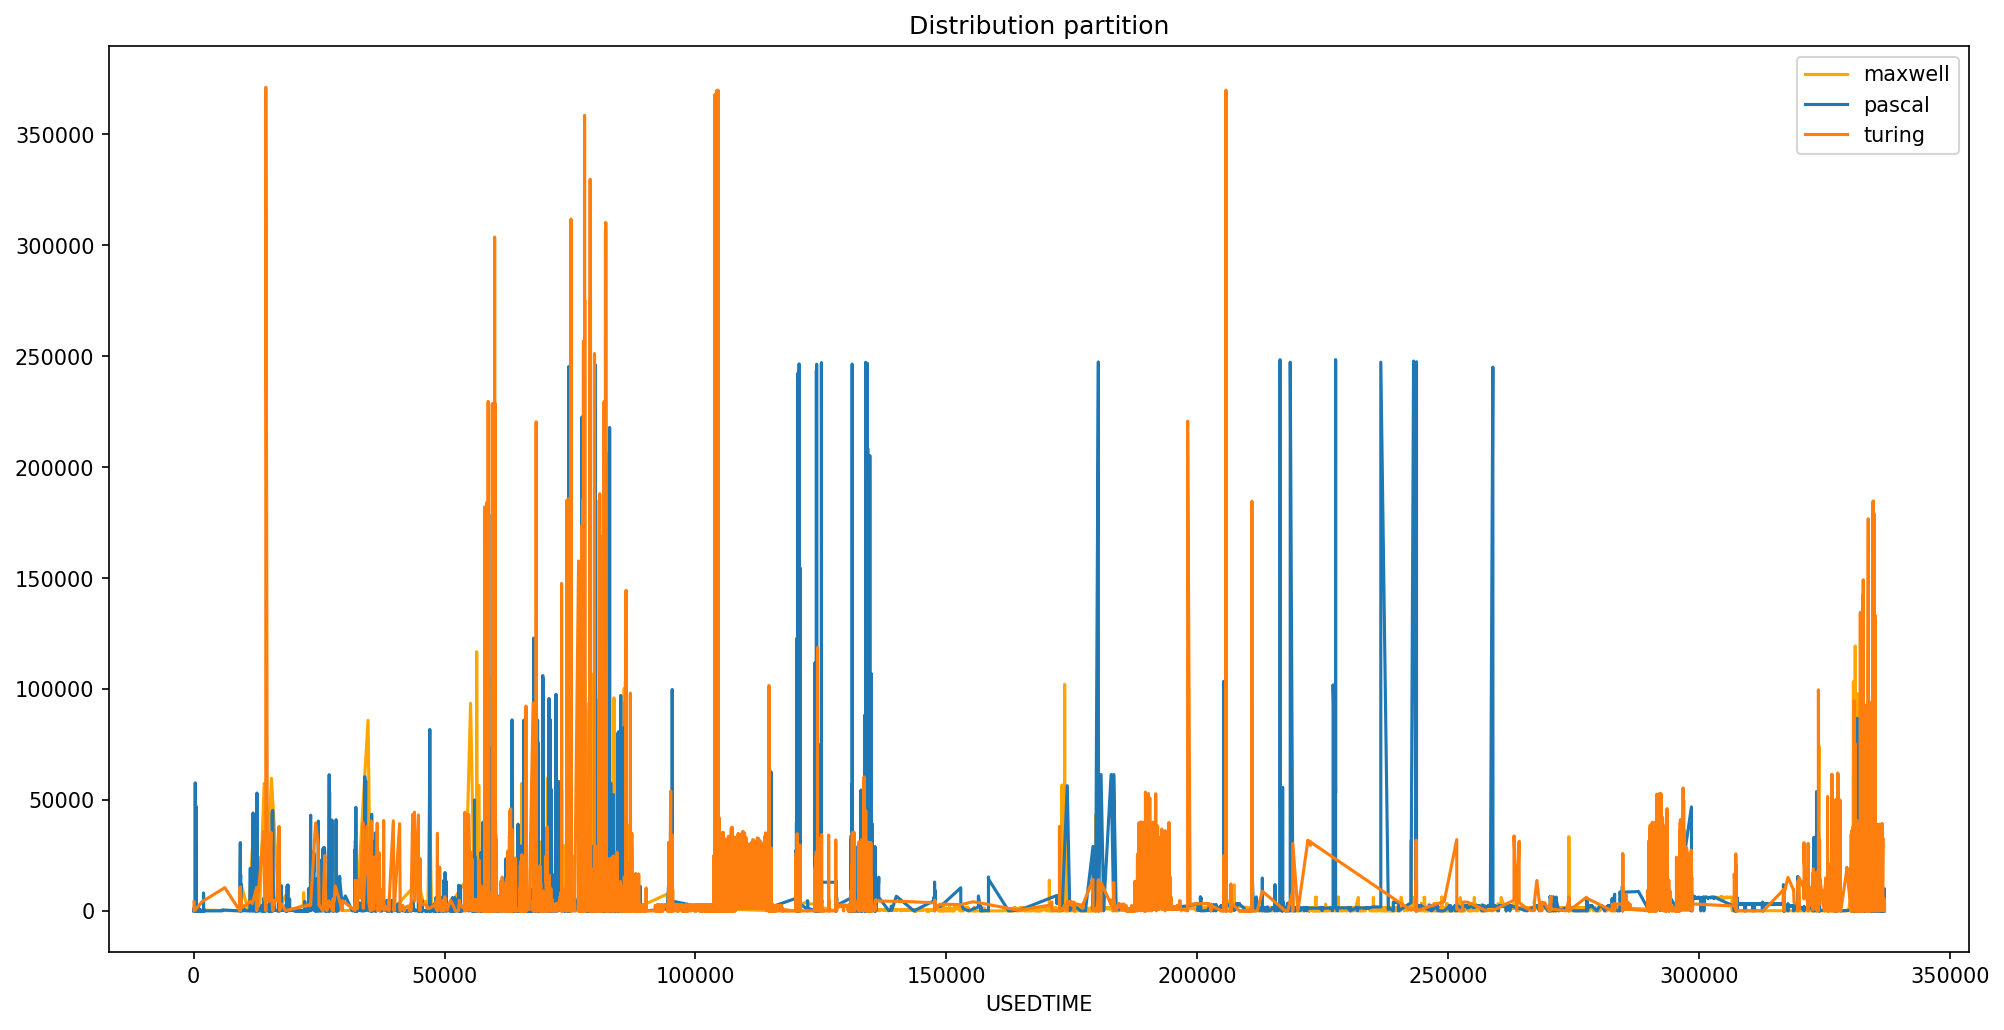

In [20]:
maxwell['USEDMEM']=pd.to_numeric(accre['USEDMEM'])
pascal['USEDMEM']=pd.to_numeric(accre['USEDMEM'])
turing['USEDMEM']=pd.to_numeric(accre['USEDMEM'])

plt.figure(figsize=(16, 8), dpi=150)
  
# using plot method to plot open prices.
# in plot method we set the label and color of the curve.
maxwell['USEDMEM'].plot(label='maxwell', color='orange')
pascal['USEDMEM'].plot(label='pascal')
turing['USEDMEM'].plot(label='turing')
  
# adding title to the plot
plt.title('Distribution partition')
  
# adding Label to the x-axis
plt.xlabel('USEDTIME')
  
# adding legend to the curve
plt.legend()